In [10]:
import os
os.getcwd()

'C:\\Users\\hp\\Documents\\E-JUST MSc Books\\Fall 2021\\CSE 521\\Project Report (FRANK & JACOB)\\Project I\\data2'

In [11]:
os.chdir('C:/Users/hp/Documents/E-JUST MSc Books/Fall 2021/CSE 521/Project Report (FRANK & JACOB)/Project I/data2')

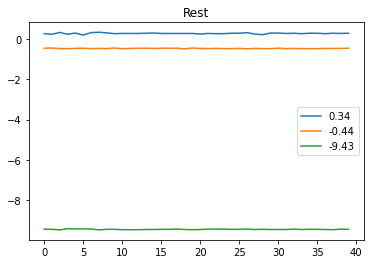

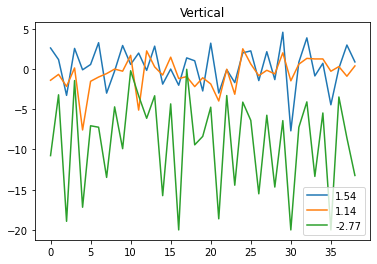

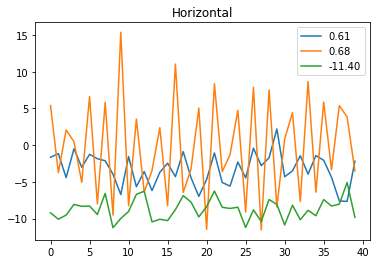

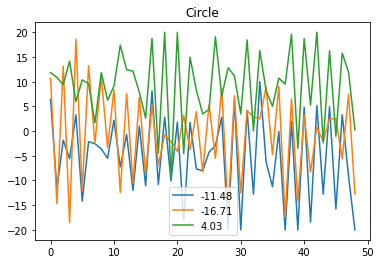

X.shape (168, 3)
y.shape (168,)
X_windows.shape (10, 31, 3)
features.shape (10, 24)
y_windows.shape (10,)


C:\Users\hp\anaconda3\envs\tf1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


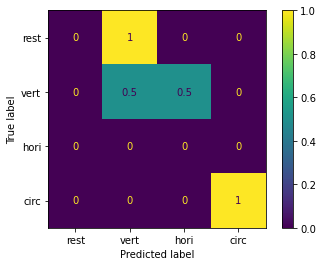

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from embedded_window import Window
from micromlgen import port
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

SAMPLING_RATE = 106
WINDOW_DURATION = 300

if __name__ == '__main__':
    # assume you saved your recordings into a "data" folder
    rest = pd.read_csv('rest.csv')
    vert = pd.read_csv('vertical.csv')
    hori = pd.read_csv('horizontal.csv')
    circ = pd.read_csv('circle2.csv')

    rest.plot(title='Rest')
    vert.plot(title='Vertical')
    hori.plot(title='Horizontal')
    circ.plot(title='Circle')
    plt.show()

    # X is the array of features to train the model on
    # y is the array of labels
    X = np.vstack([
        rest.to_numpy(),
        vert.to_numpy(),
        hori.to_numpy(),
        circ.to_numpy(),
        
    ])

    y = np.concatenate([
        0 * np.ones(len(rest)),
        1 * np.ones(len(vert)),
        2 * np.ones(len(hori)),
        3 * np.ones(len(circ)),
        
    ])

    print("X.shape", X.shape)
    print("y.shape", y.shape)
    

window = Window(length=SAMPLING_RATE * WINDOW_DURATION // 1000, shift=WINDOW_DURATION // 20)

# X_windows holds the input arranged in windows
# features holds the extracted features for each window (min/max/mean/std...)
# y_windows holds the most frequent label inside each window 
X_windows, features, y_windows = window.fit_transform(X, y)

print('X_windows.shape', X_windows.shape)
print('features.shape', features.shape)
print('y_windows.shape', y_windows.shape)

# We use half data for training, half for testing
X_train, X_test, y_train, y_test = train_test_split(features, y_windows, test_size=0.5, random_state=0)
clf = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=0).fit(X_train, y_train)

plot_confusion_matrix(clf, X_test, y_test, normalize='true', display_labels=['rest', 'vert', 'hori', 'circ'])
plt.show()

#port window to c++
with open("Window.h","w") as file:
    file.write(window.port())
    
#port classifier to c++
with open("Classifier.h","w") as file:
    file.write(port(clf, classname="Classifier", classmap={0: "rest",1: "vert", 2: "hori", 3: "circ"}))


with open("Window.h", "w") as file:
    file.write(window.port())